In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    connection = sqlite3.connect('../data/checking-logs.sqlite')
    print("Successfully connect to the database")
except sqlite3.Error as error:
    print("Error when connecting to the database", error)

Successfully connect to the database


In [4]:
pd.io.sql.read_sql('select * from checker limit 2', connection)

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1


In [5]:
query = """
select uid, timestamp, numTrials
from checker
where uid like 'user_%' and labname = 'project1' and status = 'ready'
/* order by uid */
"""
commits = pd.io.sql.read_sql(query, connection, parse_dates=['timestamp'])
connection.close()
commits

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


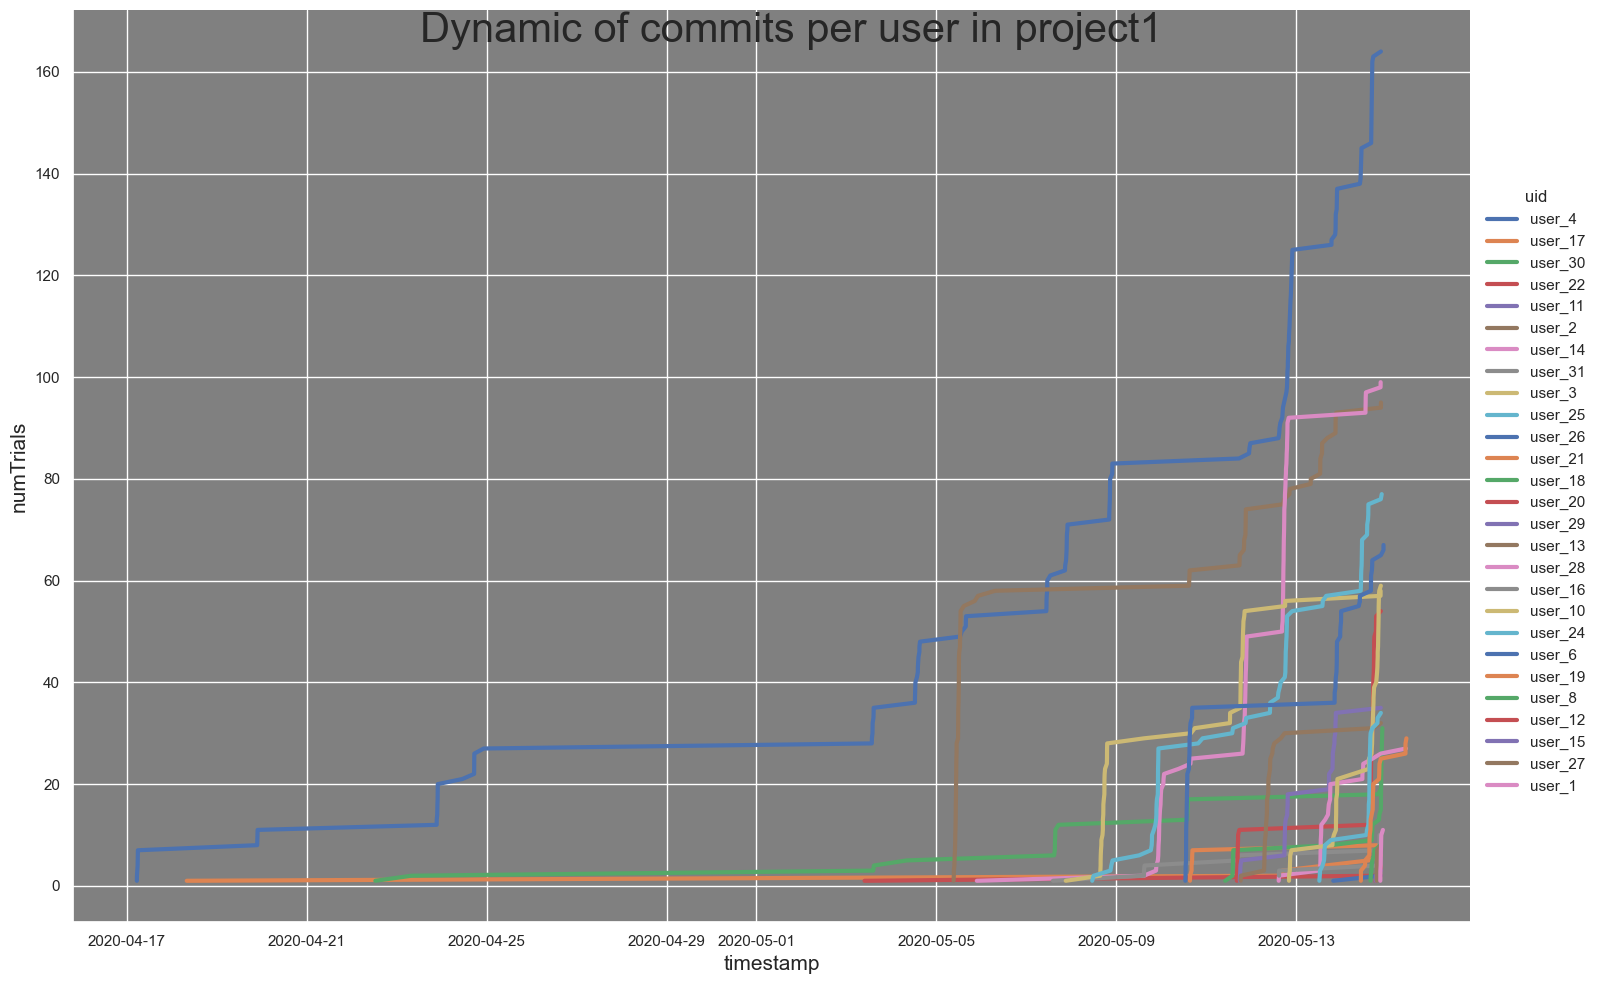

In [6]:
sns.set_theme(rc={'lines.linewidth': 3, 'axes.facecolor': 'gray', 'axes.labelsize': 15, 'axes.titlepad': 1})
rel = sns.relplot(data=commits, x='timestamp', y='numTrials', hue='uid', kind='line', height=10, aspect=1.5, palette='deep')
rel.fig.suptitle('Dynamic of commits per user in project1', fontsize=30,)
plt.show()

## • at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):

◦ “Which user was the leader in the number of commits almost all of the time?” The answer: user_\*.

◦ “Which user was the leader for only a short period of time?” The answer: user_\*.

### ◦ “Which user was the leader in the number of commits almost all of the time?”
The answer: user_4.
### ◦ “Which user was the leader for only a short period of time?”
The answer: user_2.